In [12]:
import os
import glob
import keras
import numpy as np

from skimage import io as skio
from matplotlib import pyplot as plt
from IPython.display import Image, display

In [4]:
SAMPLE_PATHS = [
    "C4 black car panel/F*-1.png",
    "C4 metal panel/F*-1.png",
    "C4 red glossy paper/F*-1.png",
    "C4 white car panel/F*-1.png",
    "C4 wood panel/F*-1.png",
    "DSYP60-not-C4/F*-1.png",
    "50ug-SamariumNitrate-Not-C4/F*-1.png",
    "C4 chunk/F*-1.png"
]

model = keras.models.load_model('models/c4-neural-network.h5')

Processing C4 black car panel ...


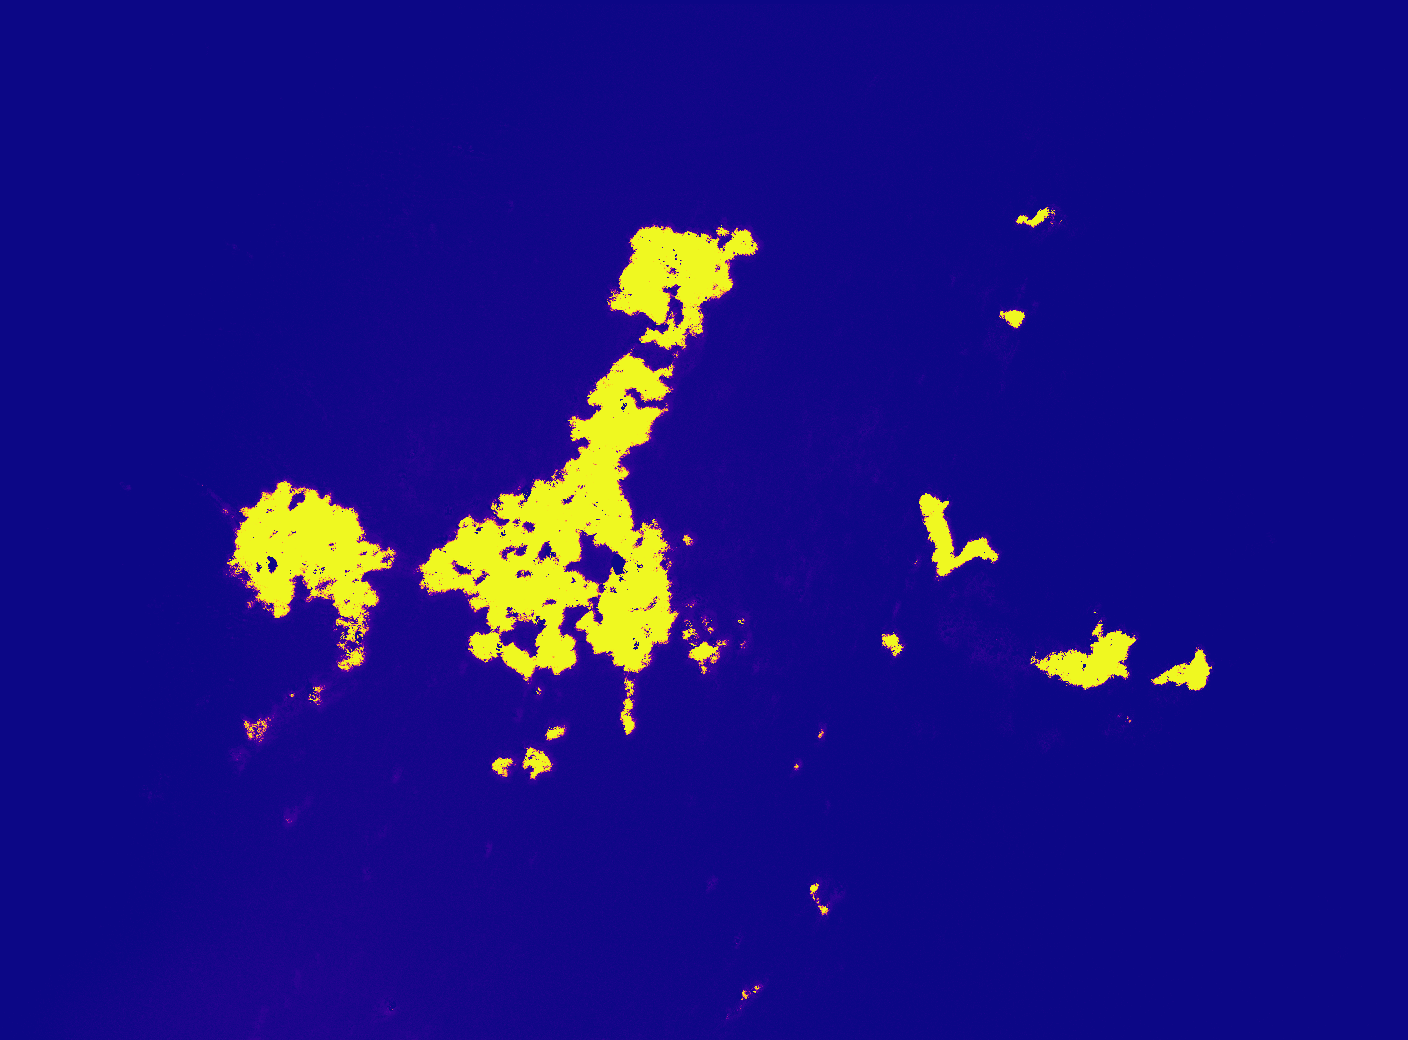

Processing C4 metal panel ...


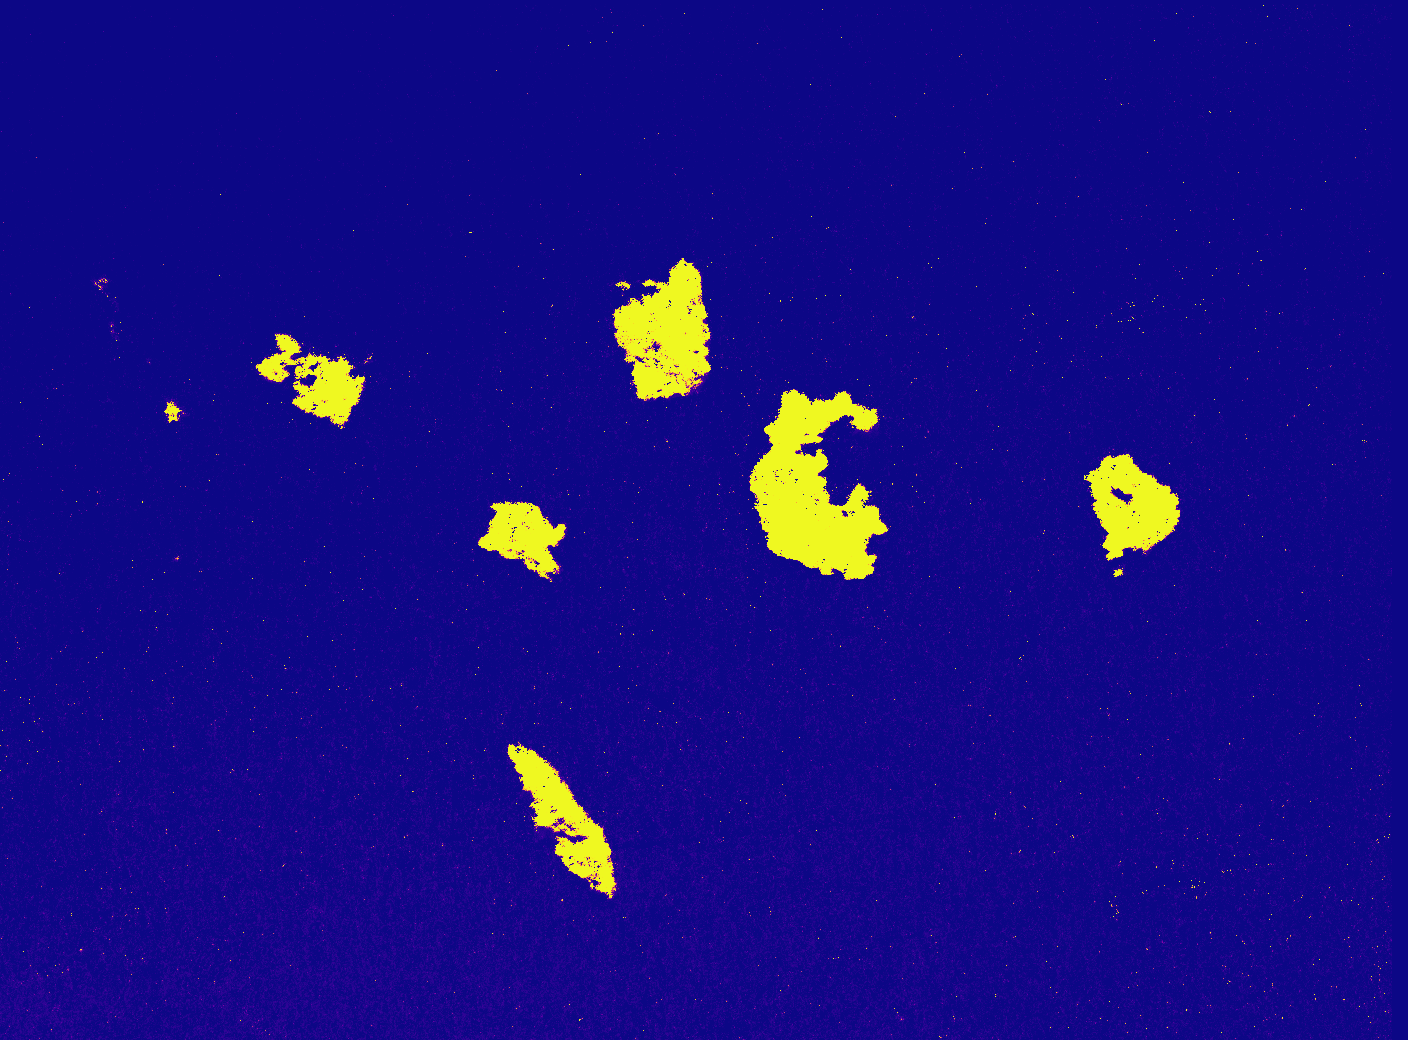

Processing C4 red glossy paper ...


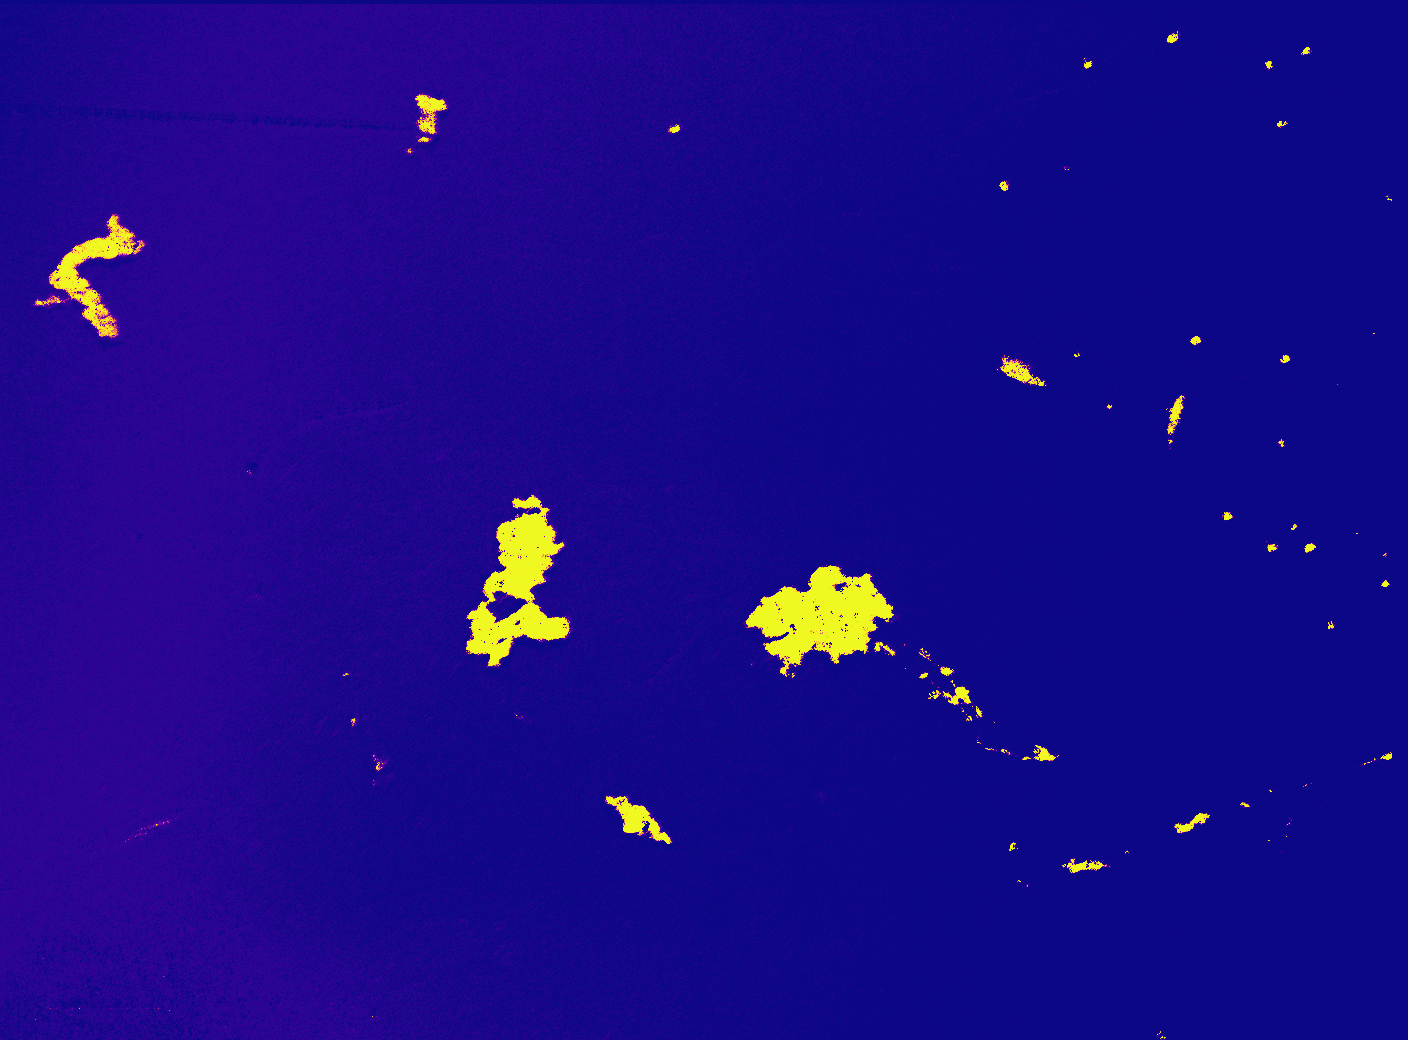

Processing C4 white car panel ...


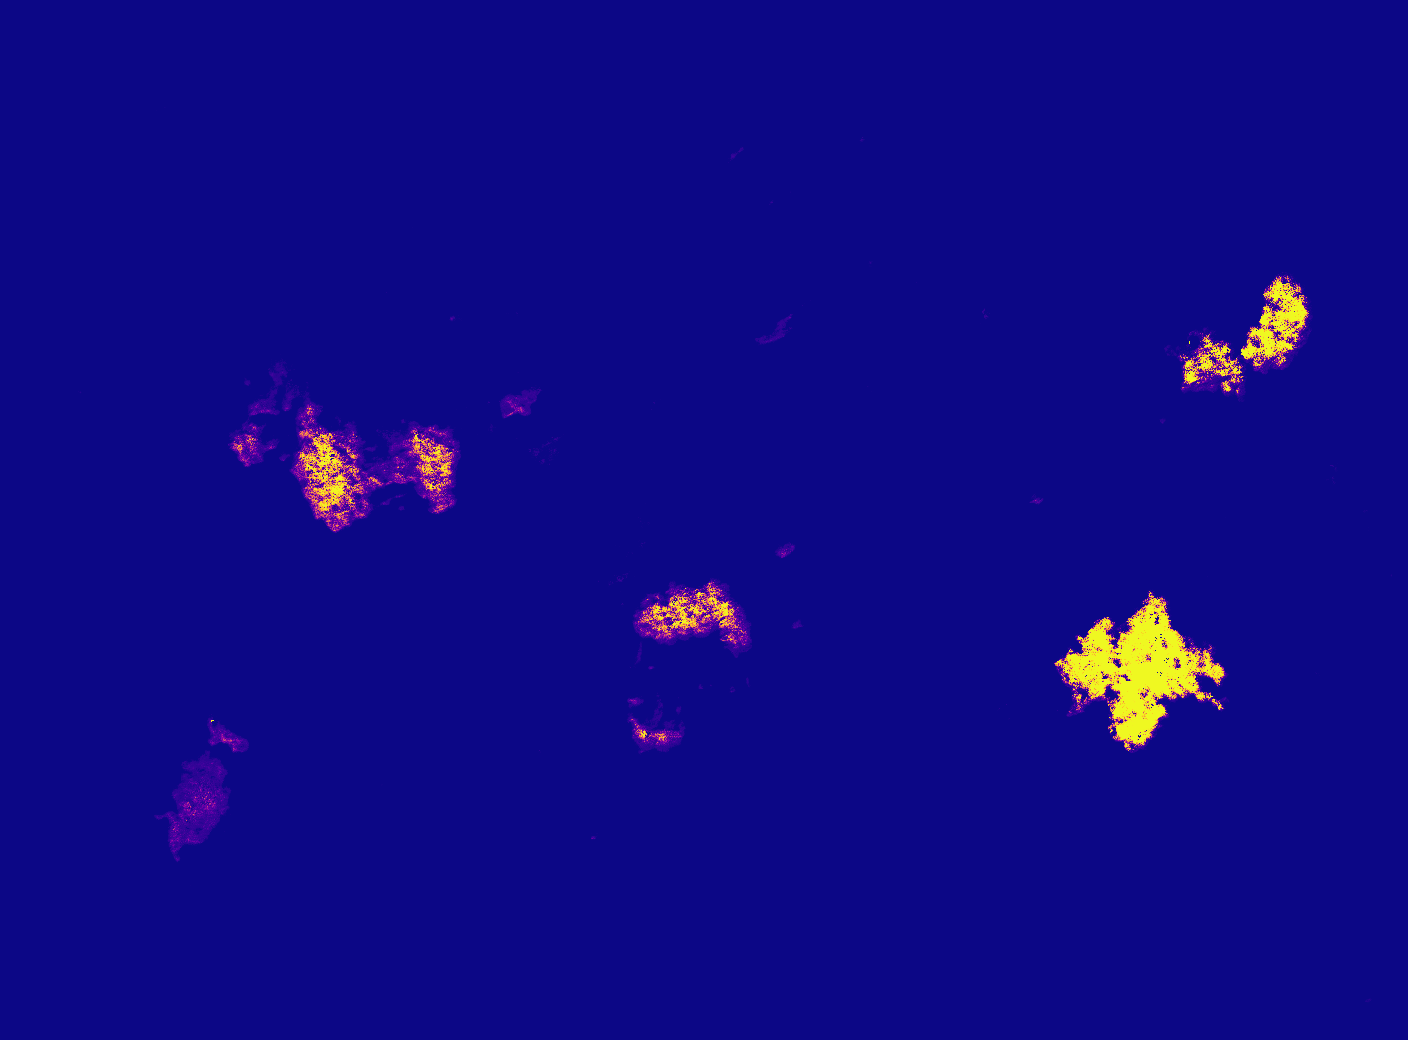

Processing C4 wood panel ...


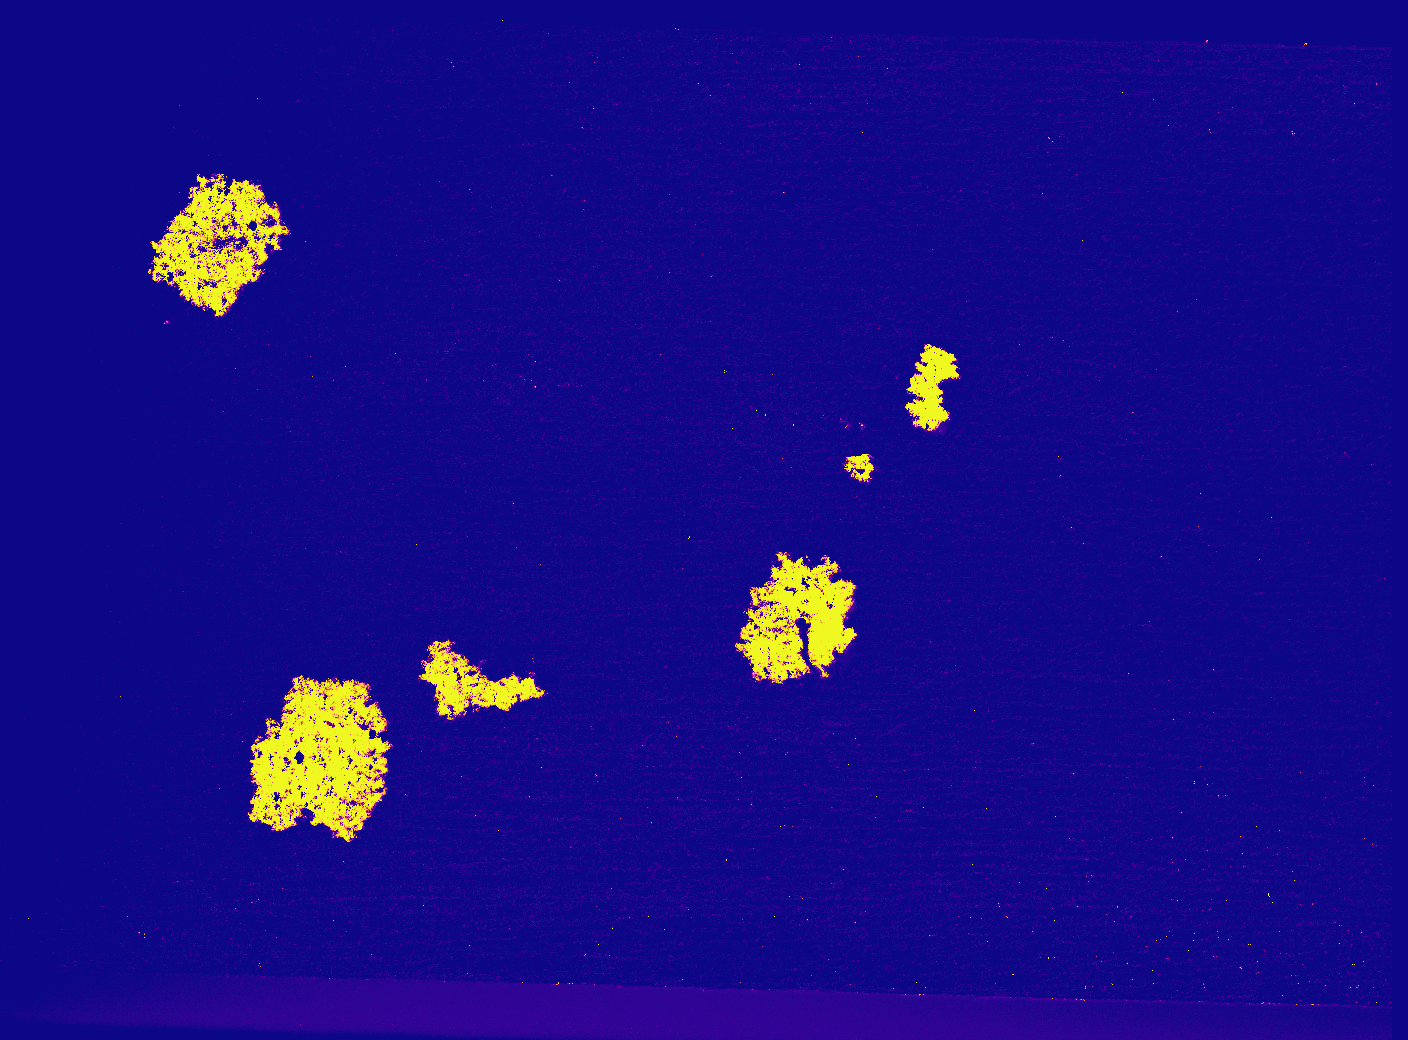

Processing DSYP60-not-C4 ...


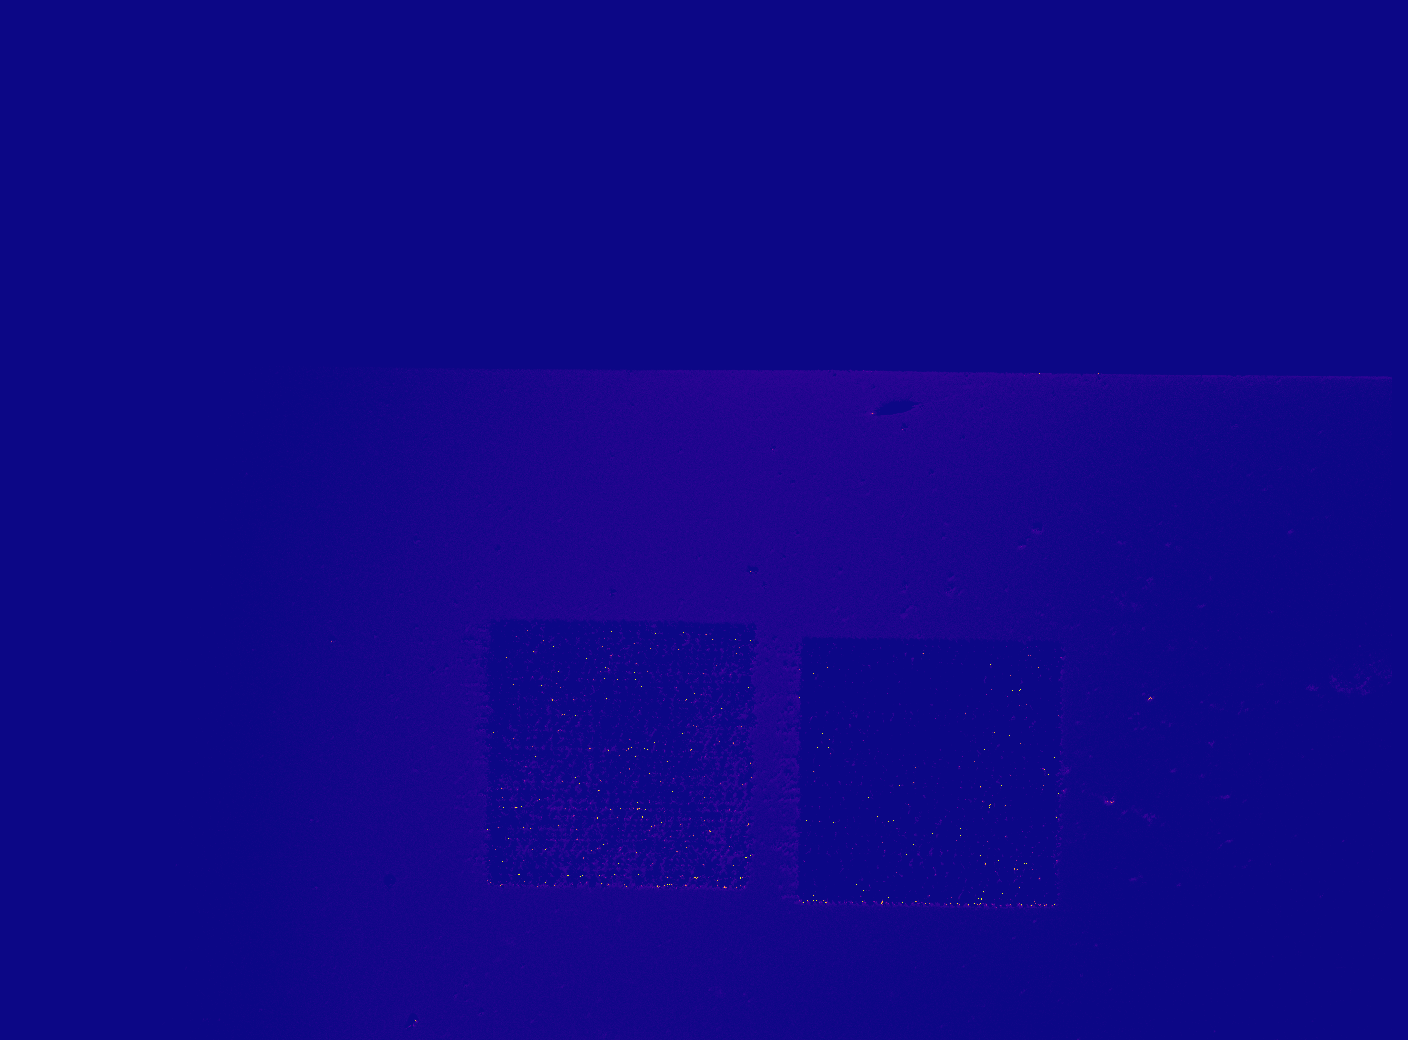

Processing 50ug-SamariumNitrate-Not-C4 ...


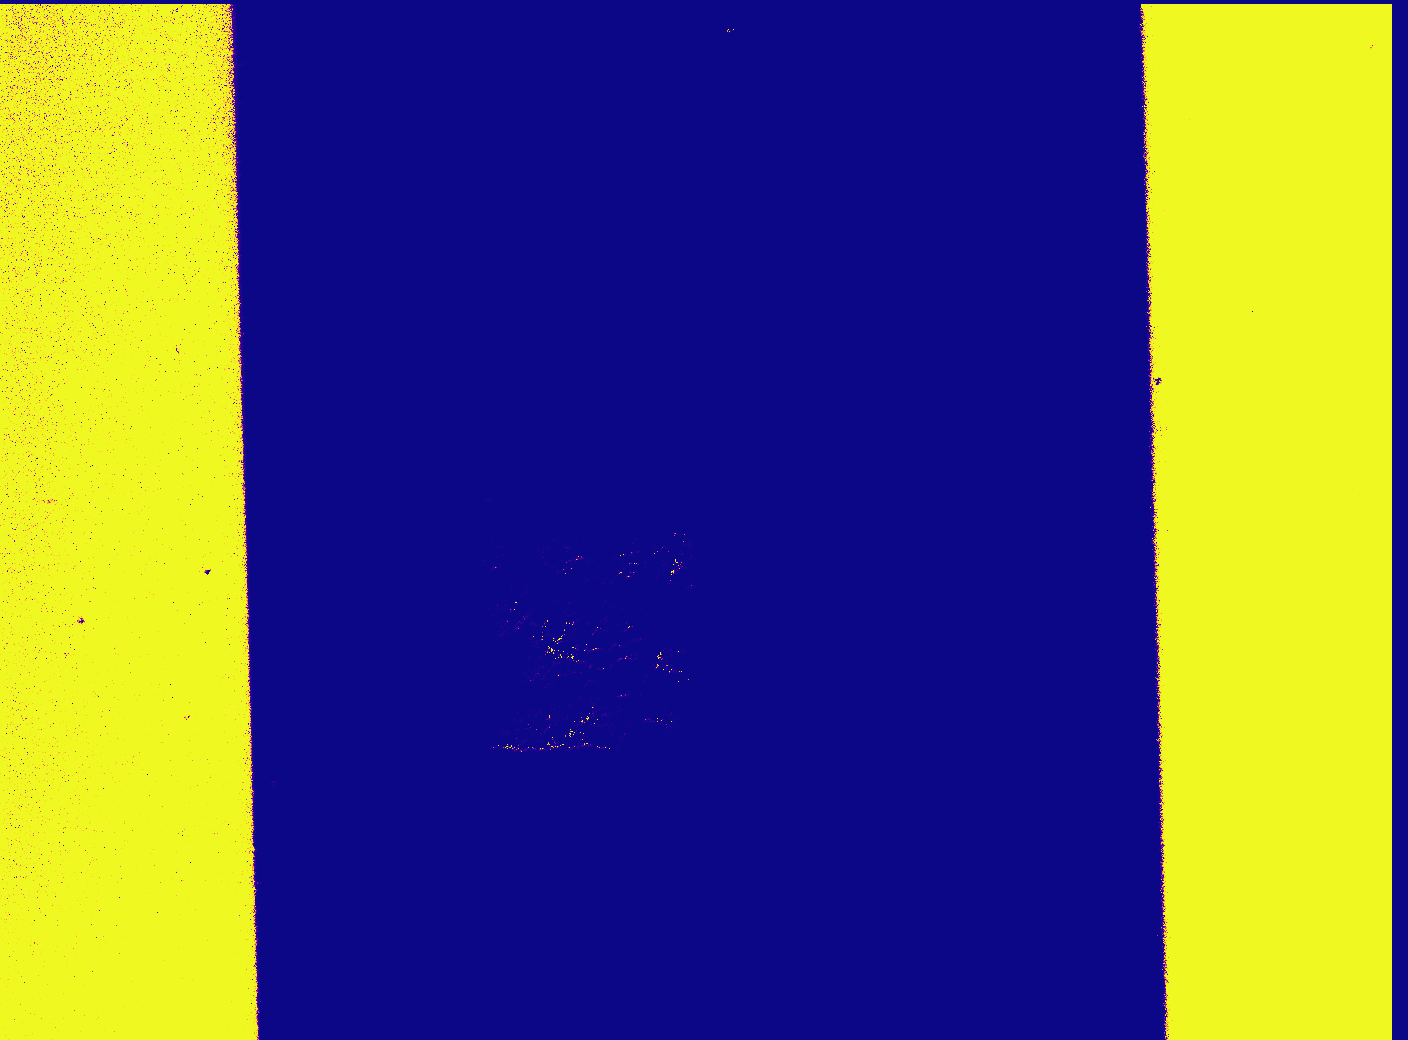

Processing C4 chunk ...


In [ ]:
for sample in SAMPLE_PATHS:
    dirname = os.path.dirname(sample)
    print("Processing", dirname, "...")
    
    images = []
    path = os.path.join(dirname, "heatmap.png")
    
    for filename in sorted(glob.glob(sample)):
        images.append(skio.imread(filename))
        
    vectors = np.stack(images, axis=-1).reshape(-1, len(images))
    vectors = vectors.astype('float32') / 255
    
    result = model.predict(vectors)
    result = np.reshape(result, (1040, 1408))

    plt.imsave(path, result, cmap="plasma")
    display(Image(path, width=200))